In [1]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt

def SEIR_eqs(INP, t):
    du = np.zeros((12))
    u = INP
    S1 = u[0] ; S2 = u[1] ; S3 = u[2]
    E1 = u[3] ; E2 = u[4] ; E3 = u[5]
    I1 = u[6] ; I2 = u[7] ; I3 = u[8]
    R1 = u[9] ; R2 = u[10] ; R3 = u[11]
    X = S1 + E1 + I1 + R1
    Y = S2 + E2 + I2 + R2
    Z = S3 + E3 + I3 + R3
    N = X + Y + Z
    du[0] = - ((beta[0,0] * S1 * I1 / N) + (beta[0,1] * S1 * I2 / N) + (beta[0,2] * S1 * I3 / N)) - (landa * S1 * Y / N)
    du[1] = - ((beta[1,0] * S2 * I1 / N) + (beta[1,1] * S2 * I2 / N) + (beta[1,2] * S2 * I3 / N)) + (landa * eta * S2 * X / N) + (beta_so * S2 * Z / N) - (alpha * S2 * Z / N)
    du[2] = - ((beta[2,0] * S3 * I1 / N) + (beta[2,1] * S3 * I2 / N) + (beta[2,2] * S3 * I3 / N)) + (landa * (1 - eta) * S2 * X / N) - (beta_so * S3 * Y / N) + (alpha * S3 * Y / N)
    du[3] = ((beta[0,0] * S1 * I1 / N) + (beta[0,1] * S1 * I2 / N) + (beta[0,2] * S1 * I3 / N)) - sigma[0] * E1 - (landa * E1 * Y / N)
    du[4] = ((beta[1,0] * S2 * I1 / N) + (beta[1,1] * S2 * I2 / N) + (beta[1,2] * S2 * I3 / N)) - sigma[1] * E2 + (landa * eta * E2 * X / N) + (beta_so * E2 * Z / N) - (alpha * E2 * Z / N)
    du[5] = ((beta[2,0] * S3 * I1 / N) + (beta[2,1] * S3 * I2 / N) + (beta[2,2] * S3 * I3 / N)) - sigma[2] * E3 + (landa * (1 - eta) * E2 * X / N) - (beta_so * E3 * Y / N) + (alpha * E3 * Y / N)
    du[6] = (sigma[0] * E1) - (gamma[0] * I1) - (landa * I1 * Y / N)
    du[7] = (sigma[1] * E2) - (gamma[1] * I2) + (landa * eta * X * I2 / N) + (beta_so * I2 * Z / N) - (alpha * I2 * Z / N)
    du[8] = (sigma[2] * E3) - (gamma[2] * I3) + (landa * (1 - eta) * X * I2 / N) - (beta_so * Y * I3 / N) + (alpha * Y * I3 / N)
    du[9] = (gamma[0] * I1) - (landa * Y * R1 / N)
    du[10] = (gamma[1] * I2) + (landa * X * R2 / N) + (beta_so * Z * R2 / N) - (alpha * Z * R2 / N)
    du[11] = (gamma[2] * I3) + (landa * (1 - eta) * X * R3 / N) - (beta_so * Y * R3 / N) + (alpha * Y * R3 / N)
    return du


In [2]:
beta = np.array([[0.1, 0.2, 0.1], [0.15, 0.25, 0.15], [0.1, 0.2, 0.1]])
gamma = [1/14, 1/25, 1/14]
sigma = [0.3333, 0.3333, 0.3333]
INPUT = [100000, 100000, 100000, 0, 0, 0, 80, 10, 10, 0, 0, 0]
alpha = 0.1
landa = 0.7
eta = 0.8
t_start = 0.0
t_end = 300
t_inc = 0.1
t_range = np.arange(t_start, t_end+t_inc, t_inc)


In [20]:
betaList = np.linspace(0, 0.4, 100)
I_data = np.zeros(100)
for i in range(100):
    beta_so = betaList[i]
    RES = spi.odeint(SEIR_eqs, INPUT, t_range)
    I = RES[:, 6] + RES[:, 7] + RES[:, 8]
    I_data[i] = max(I)


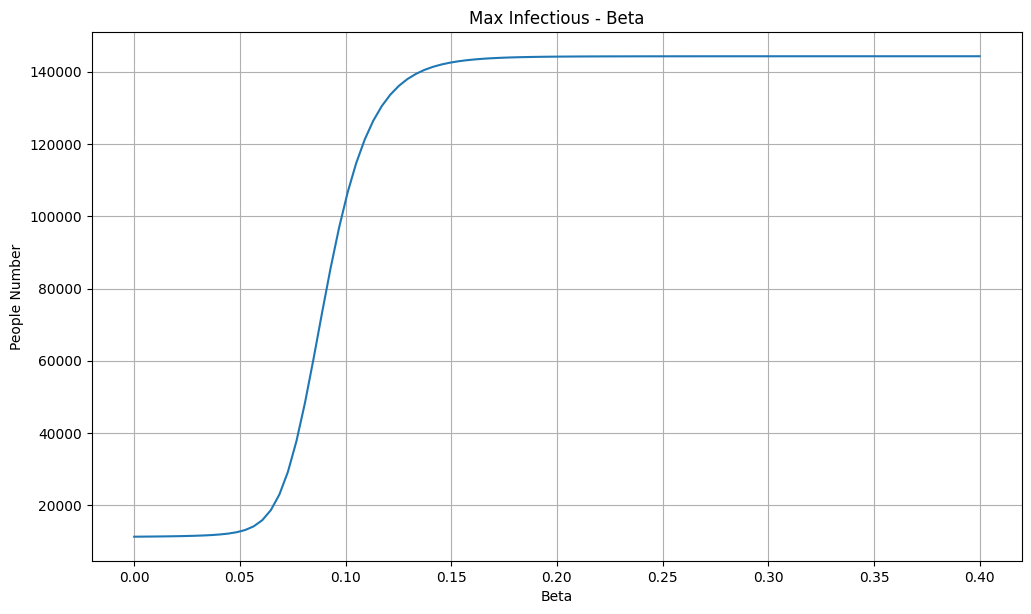

In [21]:
plt.figure(figsize=(12, 7), dpi=100)
plt.grid()
plt.xlabel('Beta')
plt.ylabel('People Number')
plt.title('Max Infectious - Beta')
plt.plot(betaList, I_data)
plt.savefig('I-beta')


In [22]:
betaList = np.linspace(0, 0.3, 100)
R_data = np.zeros(100)
for i in range(100):
    beta_so = betaList[i]
    RES = spi.odeint(SEIR_eqs, INPUT, t_range)
    R_data[i] = RES[-1, 9] + RES[-1, 10] + RES[-1, 11]


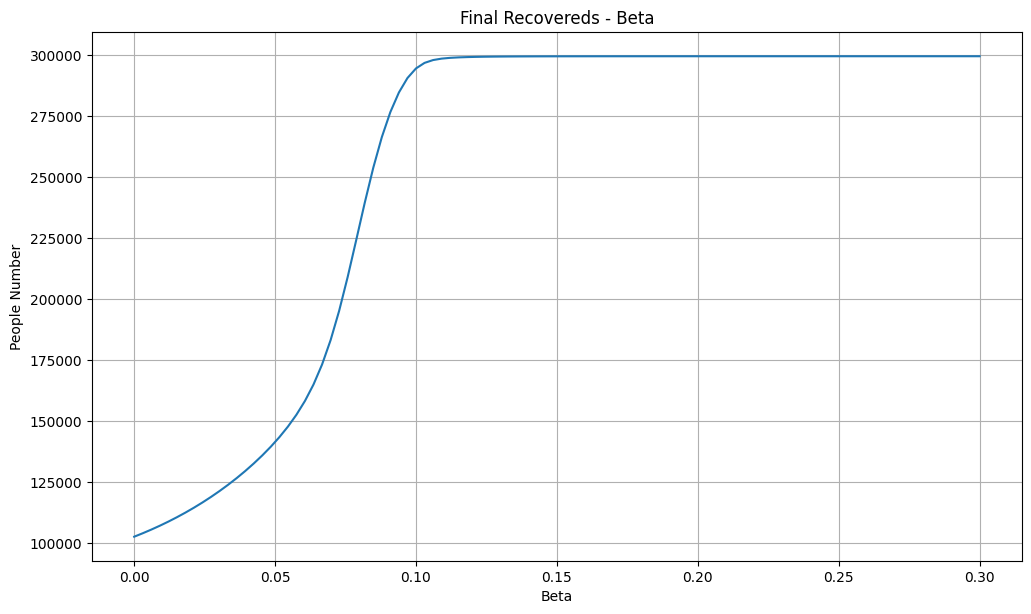

In [23]:
plt.figure(figsize=(12, 7), dpi=100)
plt.grid()
plt.xlabel('Beta')
plt.ylabel('People Number')
plt.title('Final Recovereds - Beta')
plt.plot(betaList, R_data)
plt.savefig('R-beta')


In [24]:
alphaList = np.linspace(0, 1, 200)
R_data = np.zeros(200)
beta_so = 0.2
for i in range(200):
    alpha = alphaList[i]
    RES = spi.odeint(SEIR_eqs, INPUT, t_range)
    R_data[i] = RES[-1, 9] + RES[-1, 10] + RES[-1, 11]


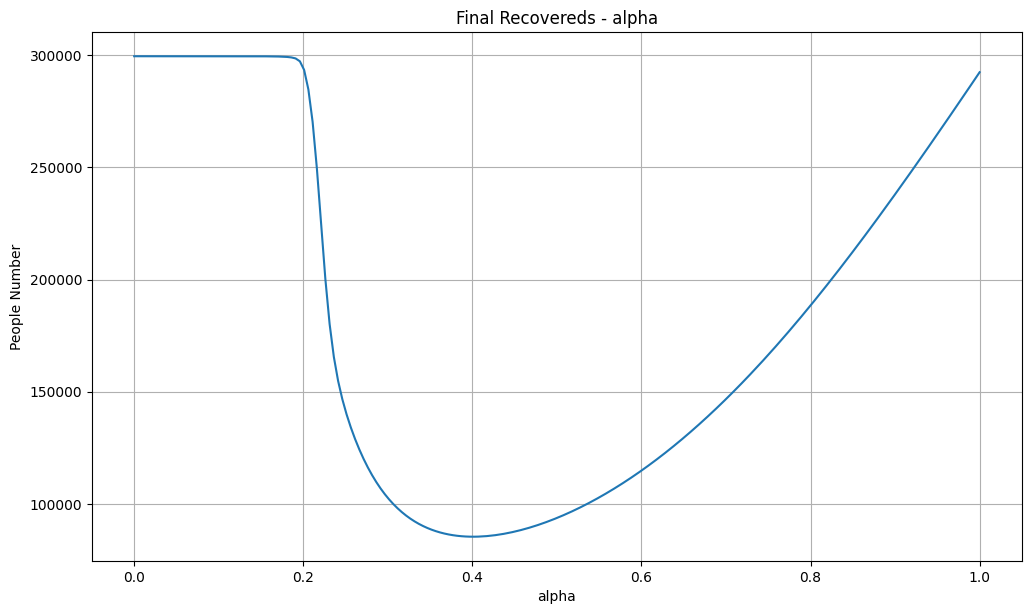

In [25]:
plt.figure(figsize=(12, 7), dpi=100)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('People Number')
plt.title('Final Recovereds - alpha')
plt.plot(alphaList, R_data)
plt.savefig('R-alpha')


In [3]:
alphaList = np.linspace(0, 1, 200)
I_data = np.zeros(200)
beta_so = 0.2
for i in range(200):
    alpha = alphaList[i]
    RES = spi.odeint(SEIR_eqs, INPUT, t_range)
    I = RES[:, 6] + RES[:, 7] + RES[:, 8]
    I_data[i] = max(I)


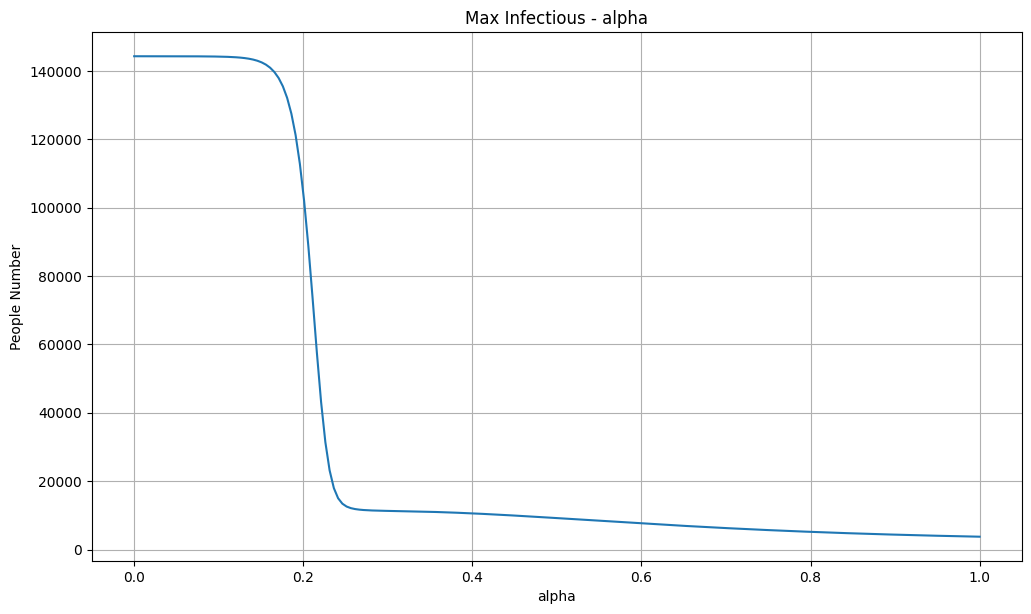

In [4]:
plt.figure(figsize=(12, 7), dpi=100)
plt.grid()
plt.xlabel('alpha')
plt.ylabel('People Number')
plt.title('Max Infectious - alpha')
plt.plot(alphaList, I_data)
plt.savefig('I-alpha')
